## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## **Reading Data:**

In [2]:
df_train = pd.read_csv("US_Accidents_March23.csv")

pd.options.display.float_format = '{:.4f}'.format

## **Data Exploration:**

### Exploring data shape

In [3]:
pd.set_option('display.max_columns', None)
df_train

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.8651,-84.0587,NaN,NaN,0.0100,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9000,NaN,91.0000,29.6800,10.0000,Calm,NaN,0.0200,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.9281,-82.8312,NaN,NaN,0.0100,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9000,NaN,100.0000,29.6500,10.0000,Calm,NaN,0.0000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.0631,-84.0326,NaN,NaN,0.0100,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0000,33.3000,100.0000,29.6700,10.0000,SW,3.5000,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.7478,-84.2056,NaN,NaN,0.0100,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1000,31.0000,96.0000,29.6400,9.0000,SW,4.6000,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.6278,-84.1884,NaN,NaN,0.0100,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0000,33.3000,89.0000,29.6500,6.0000,SW,3.5000,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.0025,-117.3794,33.9989,-117.3709,0.5430,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0000,86.0000,40.0000,28.9200,10.0000,W,13.0000,0.0000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.7670,-117.1481,32.7655,-117.1536,0.3380,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0000,70.0000,73.0000,29.3900,10.0000,SW,6.0000,0.0000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.7754,-117.8478,33.7774,-117.8573,0.5610,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0000,73.0000,64.0000,29.7400,10.0000,SSW,10.0000,0.0000,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.9925,-118.4030,33.9831,-118.3957,0.7720,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,US,US/Pacific,K

In [4]:
df_train.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
print("train data info")
df_train.info()

train data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Hu

### Statistics Summary

In [6]:
df_train.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7728394.0000,7728394.0000,7728394.0000,4325632.0000,4325632.0000,7728394.0000,7564541.0000,5729375.0000,7554250.0000,7587715.0000,7551296.0000,7157161.0000,5524808.0000
mean,2.2124,36.2012,-94.7025,36.2618,-95.7256,0.5618,61.6633,58.2510,64.8310,29.5390,9.0904,7.6855,0.0084
std,0.4875,5.0761,17.3918,5.2729,18.1079,1.7768,19.0137,22.3898,22.8210,1.0062,2.6883,5.4250,0.1102
min,1.0000,24.5548,-124.6238,24.5660,-124.5457,0.0000,-89.0000,-89.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,2.0000,33.3996,-117.2194,33.4621,-117.7543,0.0000,49.0000,43.0000,48.0000,29.3700,10.0000,4.6000,0.0000
50%,2.0000,35.8240,-87.7666,36.1835,-88.0279,0.0300,64.0000,62.0000,67.0000,29.8600,10.0000,7.0000,0.0000
75%,2.0000,40.0850,-80.3537,40.1789,-80.2471,0.4640,76.0000,75.0000,84.0000,30.0300,10.0000,10.4000,0.0000
max,4.0000,49.0022,-67.1132,49.0750,-67.1092,441.7500,207.0000,207.0000,100.0000,58.6300,140.0000,1087.0000,36.4700


### Checking null values

In [7]:
print("train data null cells")
print(df_train.isnull().sum())

train data null cells
ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity              

In [8]:
df_train.isnull().sum().sort_values(ascending=False)/len(df_train)

End_Lat                 0.4403
End_Lng                 0.4403
Precipitation(in)       0.2851
Wind_Chill(F)           0.2587
Wind_Speed(mph)         0.0739
Visibility(mi)          0.0229
Wind_Direction          0.0227
Humidity(%)             0.0225
Weather_Condition       0.0224
Temperature(F)          0.0212
Pressure(in)            0.0182
Weather_Timestamp       0.0156
Nautical_Twilight       0.0030
Civil_Twilight          0.0030
Sunrise_Sunset          0.0030
Astronomical_Twilight   0.0030
Airport_Code            0.0029
Street                  0.0014
Timezone                0.0010
Zipcode                 0.0002
City                    0.0000
Description             0.0000
Traffic_Signal          0.0000
Roundabout              0.0000
Station                 0.0000
Stop                    0.0000
Traffic_Calming         0.0000
Country                 0.0000
Turning_Loop            0.0000
No_Exit                 0.0000
End_Time                0.0000
Start_Time              0.0000
Severity

## **Data Preprocessing:** In this section we handle all null values with convering some features either from categorical to numerical or binary and from continyous to discerete form (bin groups)

### Dropping unneccesary columns ["End_Lat", "End_Lang", "Perceptation", "Wind_Chill"]

from data exploration section, we can see that there are null values in many columns. So this will be a bit challenging cleaning most of those columns. For "End_Lat" and "End_Lang" columns we will just drop them, as they are not that effective features we may need same as "Perceptation" and "Wind_Chill". Also "Turning_Loop" column will be dropped as its value is constant and doesn't change.

In [9]:
df_train.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df_train.drop(["End_Lat", "End_Lng", "Precipitation(in)","Wind_Chill(F)", "Turning_Loop"], axis=1, inplace=True)

### Changing Boolean Columns to numerical 0/1 [Night/False --> 0 , Day/True --> 1]

In [11]:
cols_to_convert = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


for col in cols_to_convert:
    df_train[col] = df_train[col].map({"Night":0, "Day":1})

In [12]:
cols_to_convert = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                   'Traffic_Signal']

for col in cols_to_convert:
    df_train[col] = df_train[col].map({True:1, False:0})

In [13]:
df_train

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.8651,-84.0587,0.0100,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9000,91.0000,29.6800,10.0000,Calm,NaN,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.9281,-82.8312,0.0100,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9000,100.0000,29.6500,10.0000,Calm,NaN,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,1.0000
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.0631,-84.0326,0.0100,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0000,100.0000,29.6700,10.0000,SW,3.5000,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0000,1.0000,1.0000
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.7478,-84.2056,0.0100,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1000,96.0000,29.6400,9.0000,SW,4.6000,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,1.0000,1.0000,1.0000
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.6278,-84.1884,0.0100,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0000,89.0000,29.6500,6.0000,SW,3.5000,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.0025,-117.3794,0.5430,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0000,40.0000,28.9200,10.0000,W,13.0000,Fair,0,0,0,0,0,0,0,0,0,0,0,0,1.0000,1.0000,1.0000,1.0000
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.7670,-117.1481,0.3380,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0000,73.0000,29.3900,10.0000,SW,6.0000,Fair,0,0,0,0,0,0,0,0,0,0,0,0,1.0000,1.0000,1.0000,1.0000
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.7754,-117.8478,0.5610,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0000,64.0000,29.7400,10.0000,SSW,10.0000,Partly Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,1.0000,1.0000,1.0000,1.0000
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.9925,-118.4030,0.7720,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0000,81.0000,29.6200,10.0000,SW,8.0000,Fair,0,0,0,0,0,0,0,0,0,0,0,0,1.0000,1.0000,1.0000,1.0000


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 41 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Humidity(%)            float64
 20  Pressure(in)           float64
 21  Visibility(mi)         float64
 22  Wind_Direction    

### Changing Source Column to Numerical

In [15]:
df_train["Source"] = df_train["Source"].replace({"Source1":1, "Source2":2, "Source3":3})

### Create bin groups of Temperature, Humidity and Pressure columns

In [16]:
df_train['Temperature_binned'] = pd.cut(df_train['Temperature(F)'], bins=4)
df_train['Humidity_binned'] = pd.cut(df_train['Humidity(%)'], bins=4)
df_train['Pressure_binned'] = pd.cut(df_train['Pressure(in)'], bins=4)


### Handling Null Values

For the remaining columns we can either drop the null values as the portion is not that big, or we try to get the correlation between columns and try to fill the null values with suitable values.

In [17]:
print(len(df_train))
df_train = df_train.dropna()
df_train = df_train.reset_index()
print(len(df_train))

7728394
7051556


As we can see removing the null values didn't affect the data that much and we still have large amount of data to do our analysis, so we will go along with this approach

## **Descriptive Analysis:**

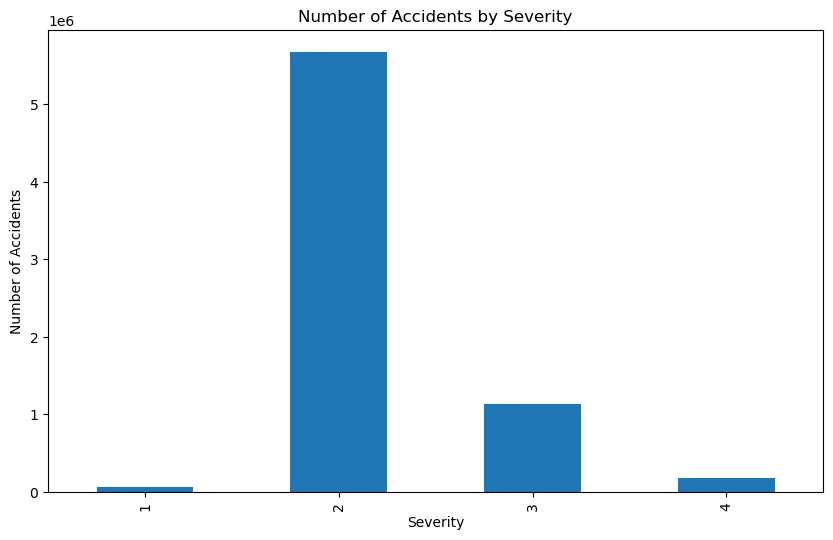

In [38]:
plt.figure(figsize=(10,6))
df_train['Severity'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

A first insight to see how biased our data is, adn from the above figure we can observe that the data is very biased toward severity 2 accidents. To be noted from this observation, that due to this bias only trends can be investigated, but no specific relationships between severity type and any factor can be analysed, as in any case we will find that any analysis we do will be in the favour of severity 2. If we want to avoid this bias, we should balance the data by either gathering more data or removing random portions of the data till all the severities are equal in ratios. Another approach is to make this task a binary task where to convert the severities to "severity2" or "not severity2" by compining all the other severities on one category then balancing both categories by removing the excess data.

#### Investigating cocorrelations between severity and different factors


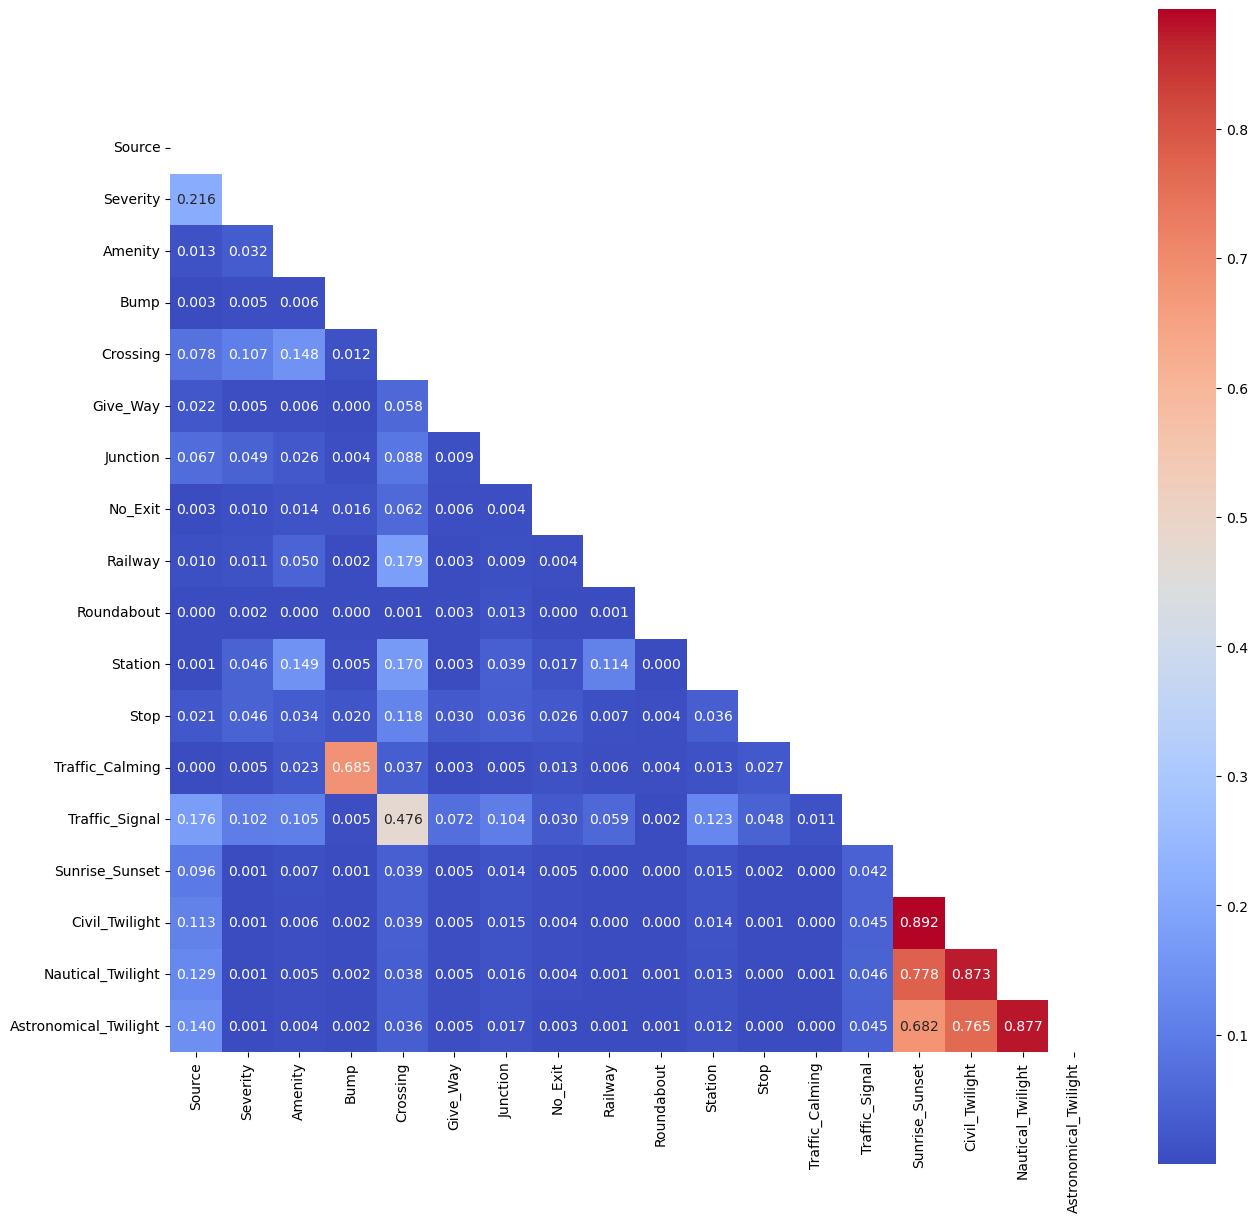

In [39]:
selected_columns = ["Source", "Severity", 'Amenity', 'Bump', 'Crossing', 'Give_Way', 
                    'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                    'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 
                    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

correlation_matrix = df_train[selected_columns].corr().abs()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", mask=mask, square=True, cmap='coolwarm')
plt.show()

**Findings:** as expected it is hard to find any specific relations between severity and any of the factors due to the bias in the data.

#### Investigating Weather Impact on accidents

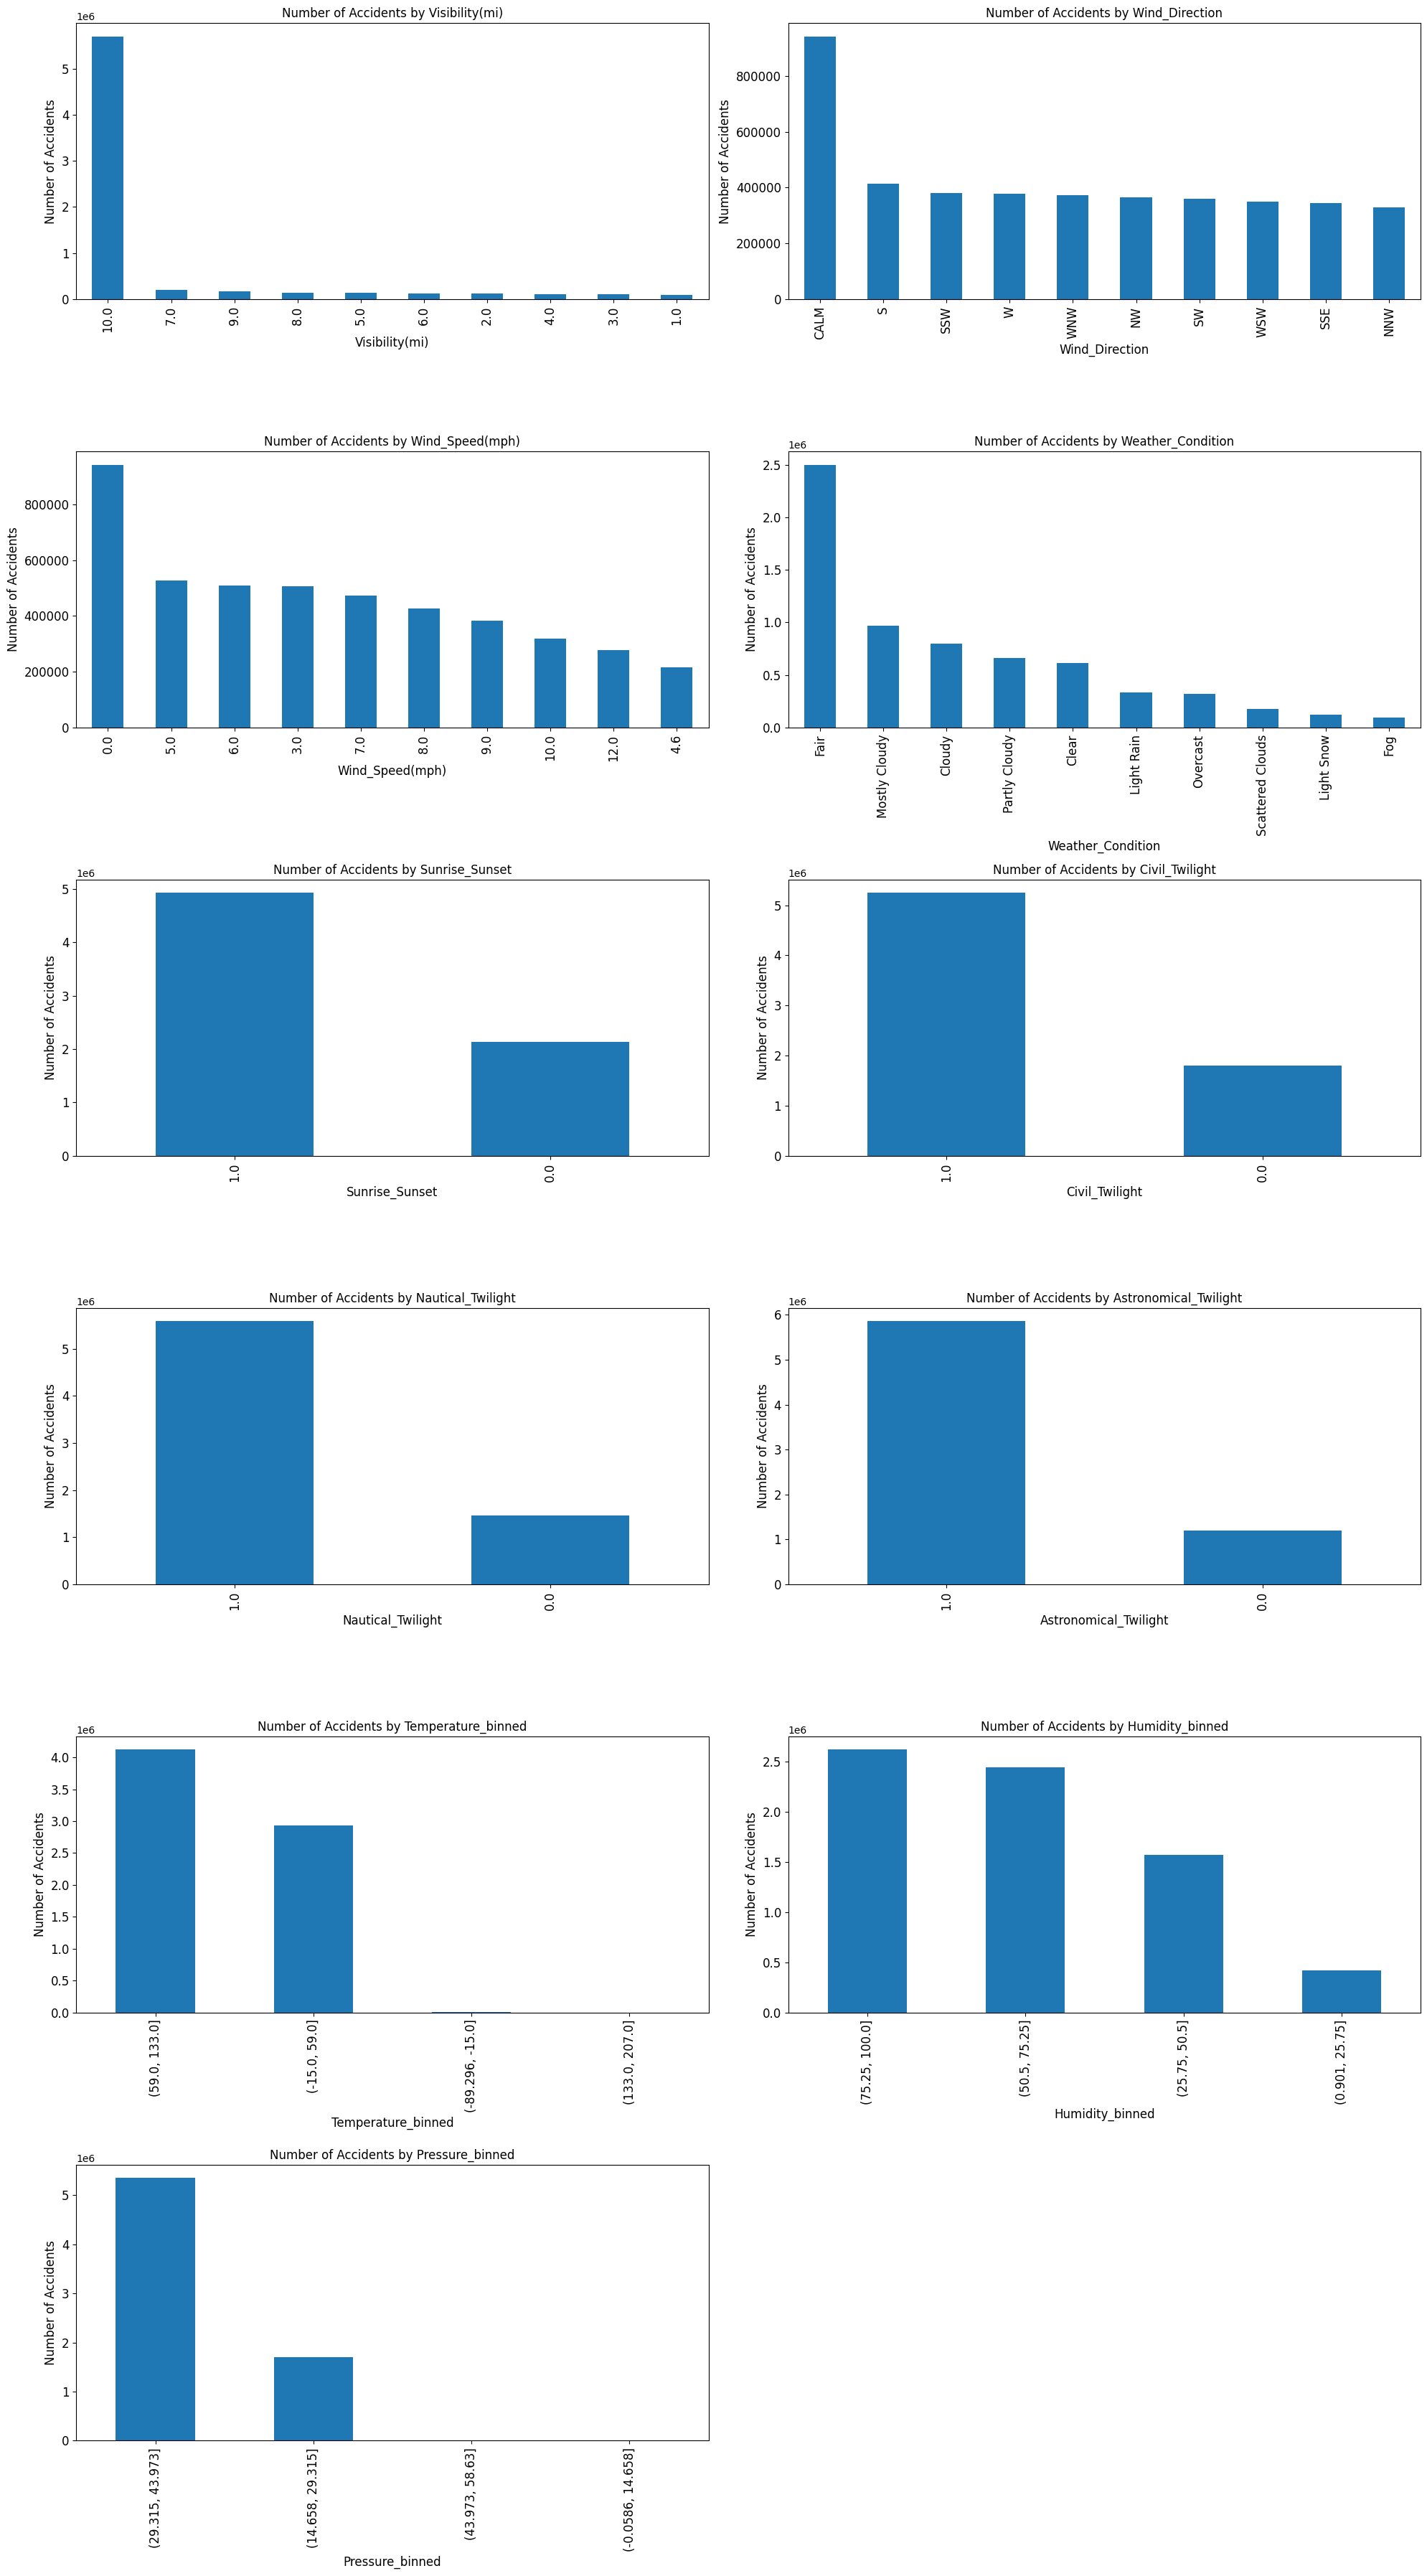

In [22]:
features = ['Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 
            'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
            'Temperature_binned', 'Humidity_binned', 'Pressure_binned']

n_cols = 2
n_rows = int(np.ceil(len(features) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 6*n_rows))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    df_train[feature].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'Number of Accidents by {feature}',fontsize=12)
    axs[row, col].set_xlabel(feature,fontsize=12)
    axs[row, col].set_ylabel('Number of Accidents',fontsize=12)
    axs[row, col].tick_params(axis='x', labelsize=12)
    axs[row, col].tick_params(axis='y', labelsize=12)

if len(features) % n_cols != 0:
    for col in range(len(features) % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, col])

plt.tight_layout()
plt.show()

**Findings:** From the above figures we can find that:

*   According to Night/Day time: Most of the accidents occured at day, as the portion of cars and vehicles on the road during the day is much much higher than that during the night because of the school time, work time, most of the people are awake at day, ...,etc.

*   According to cabin Weather Conditions: As expected most of the accidents occured on good(Fair) weather conditions which includes good temperature, normal pressure, good visibility,...,etc. And again this is because of the high portion of vehicles on the road during these conditions, as while under any other condition that can be categorized as bad conditions; roads are closed, people are afraid to drive and most activities are paused.

### Investigating Surrounding Road Services Impact on Accidents

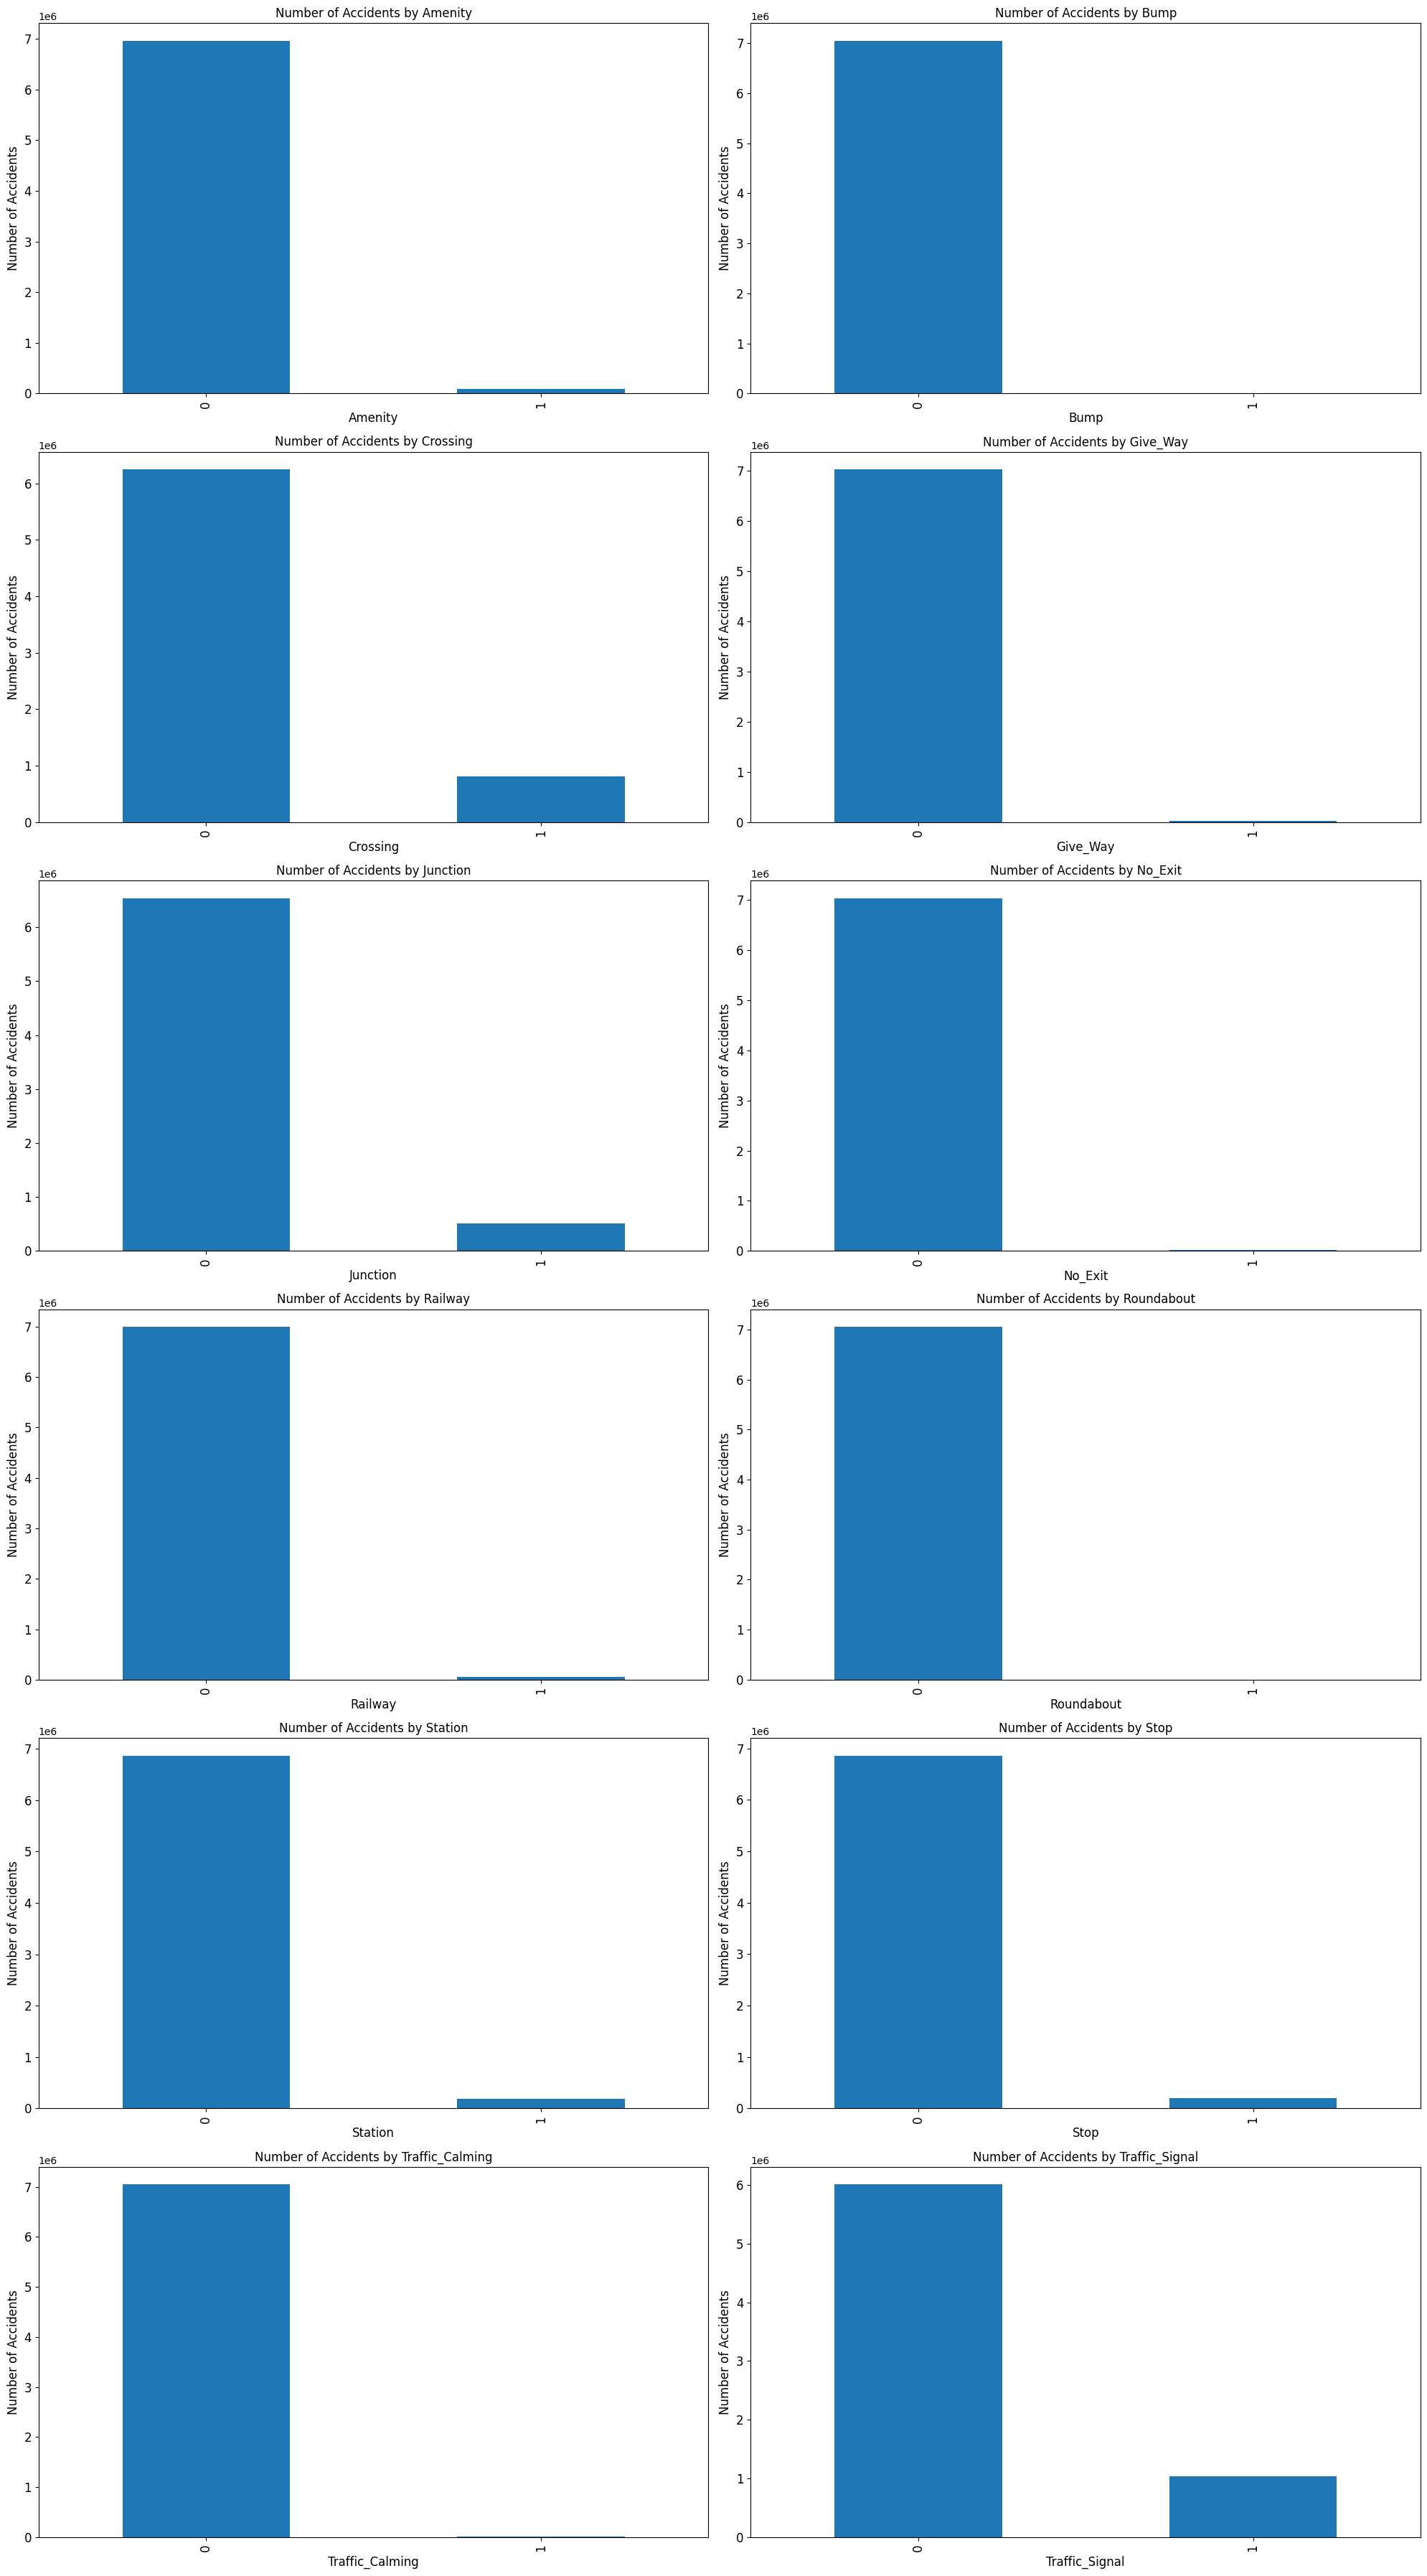

In [24]:
features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
            'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
            'Traffic_Signal']

n_cols = 2
n_rows = int(np.ceil(len(features) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 6*n_rows))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    df_train[feature].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'Number of Accidents by {feature}',fontsize=12)
    axs[row, col].set_xlabel(feature,fontsize=12)
    axs[row, col].set_ylabel('Number of Accidents',fontsize=12)
    axs[row, col].tick_params(axis='x', labelsize=12)
    axs[row, col].tick_params(axis='y', labelsize=12)

if len(features) % n_cols != 0:
    for col in range(len(features) % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, col])

plt.tight_layout()
plt.show()

**Findings:** No insight can be observed or concluded from these figures and it needs more investigations. 

### Investigating Trends based on location

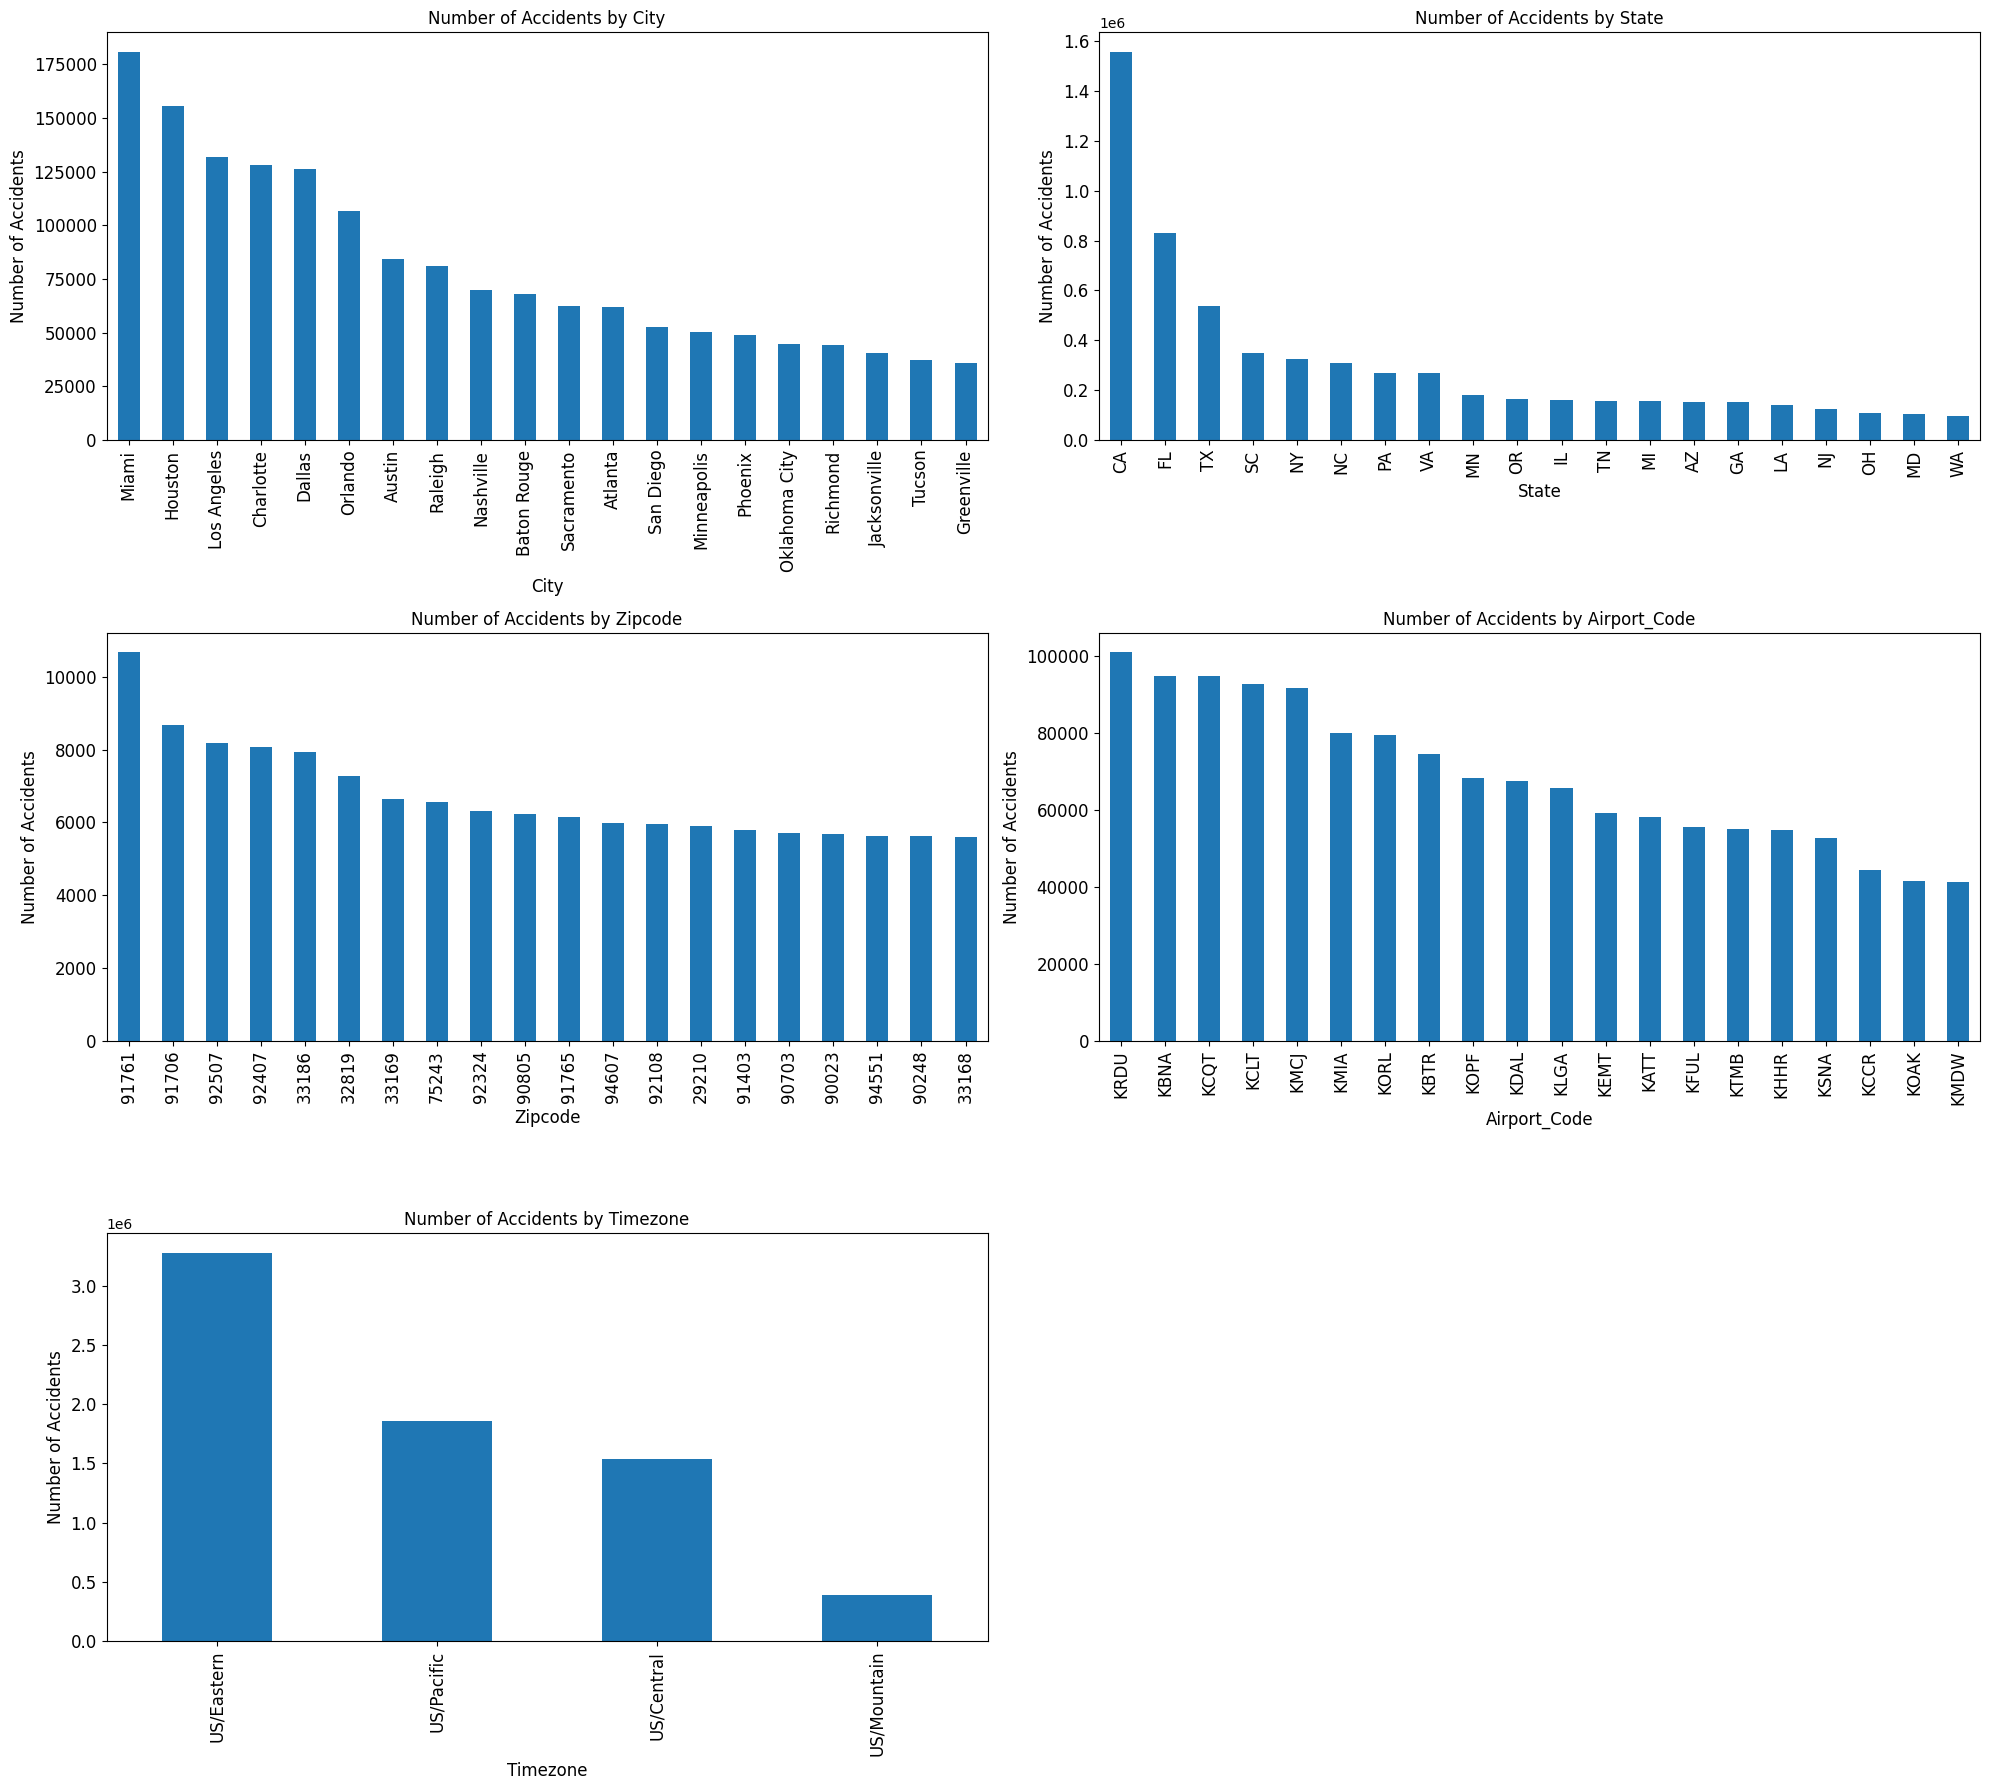

In [25]:

features = ["City","State", "Zipcode", "Airport_Code", "Timezone"]

n_cols = 2
n_rows = int(np.ceil(len(features) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 6*n_rows))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    df_train[feature].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'Number of Accidents by {feature}',fontsize=12)
    axs[row, col].set_xlabel(feature,fontsize=12)
    axs[row, col].set_ylabel('Number of Accidents',fontsize=12)
    axs[row, col].tick_params(axis='x', labelsize=12)
    axs[row, col].tick_params(axis='y', labelsize=12)

if len(features) % n_cols != 0:
    for col in range(len(features) % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, col])

plt.tight_layout()
plt.show()

**Findings:** From the above figures we can find that:

*   According to location: Most of the accidents happened in CA state as observed and the number of accidents is very high compared to the state following CA. And this need more investigating to search for the real causes of this number of accidents, and may be some more restict road rules can be applied.  

### Investigating Trends based on year/month/week/day/time

In [75]:
df_train.Start_Time = pd.to_datetime(df_train.Start_Time, format="mixed")
df_train['Month']   = df_train['Start_Time'].dt.month
df_train['Year']    = df_train['Start_Time'].dt.year
df_train['Week']    = df_train['Start_Time'].dt.isocalendar().week
df_train['Weekday'] = df_train['Start_Time'].dt.weekday
df_train['Hour']    = df_train['Start_Time'].dt.hour

#### Year Analysis 

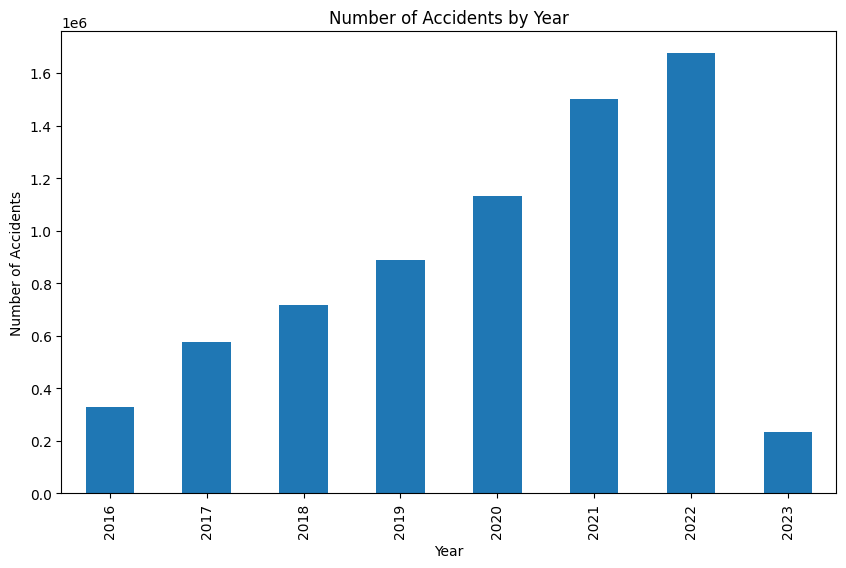

In [71]:
plt.figure(figsize=(10,6))
df_train['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

#### Month Analysis

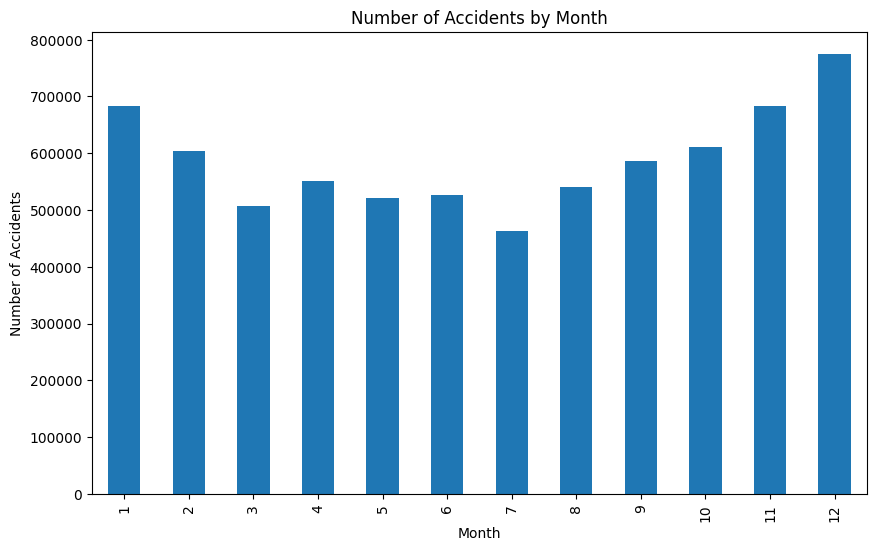

In [72]:
plt.figure(figsize=(10,6))
df_train['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

##### Months per year analysis

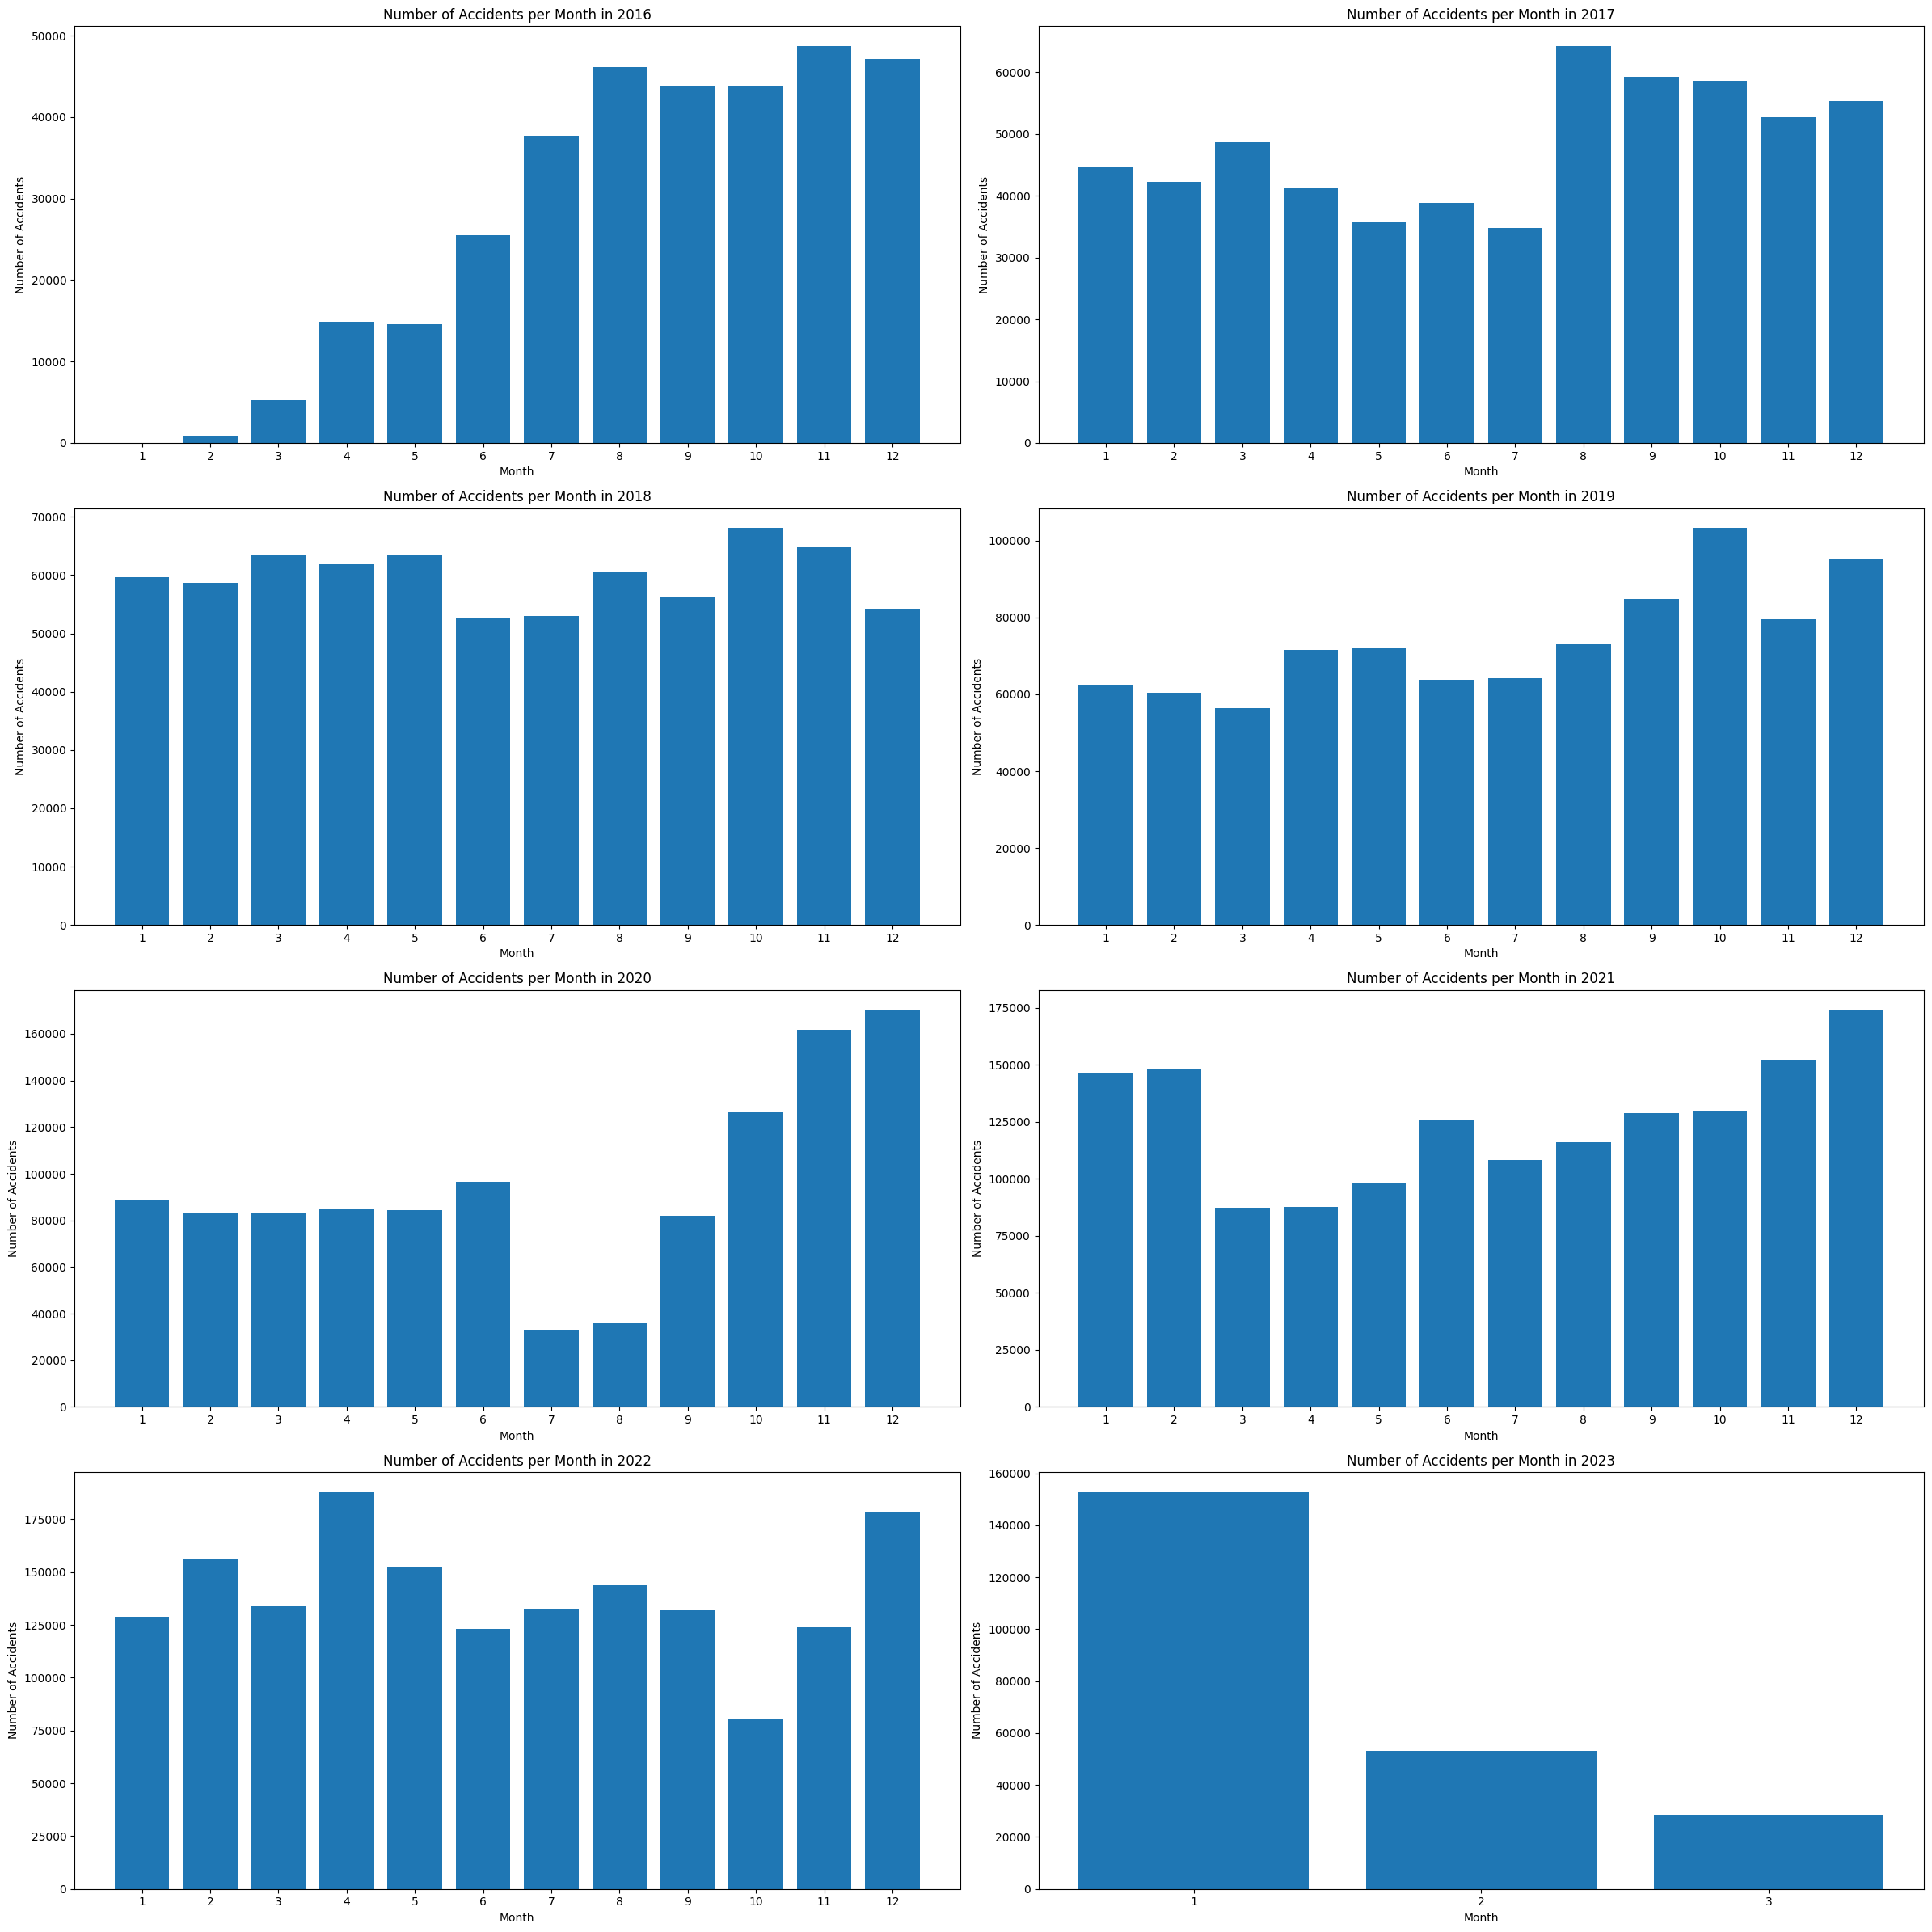

In [73]:
grouped = df_train.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

n_cols = 2
n_years = len(grouped['Year'].unique())
n_rows = int(np.ceil(n_years / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12*n_cols, 6*n_rows))

for i, year in enumerate(grouped['Year'].unique()):
    row = i // n_cols
    col = i % n_cols
    monthly_data = grouped[grouped['Year'] == year]
    axs[row, col].bar(monthly_data['Month'], monthly_data['Accident_Count'], tick_label=monthly_data['Month'])
    axs[row, col].set_title(f'Number of Accidents per Month in {year}')
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Number of Accidents')

if n_years % n_cols != 0:
    for col in range(n_years % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, col])

plt.tight_layout()
plt.show()

#### Week Analysis

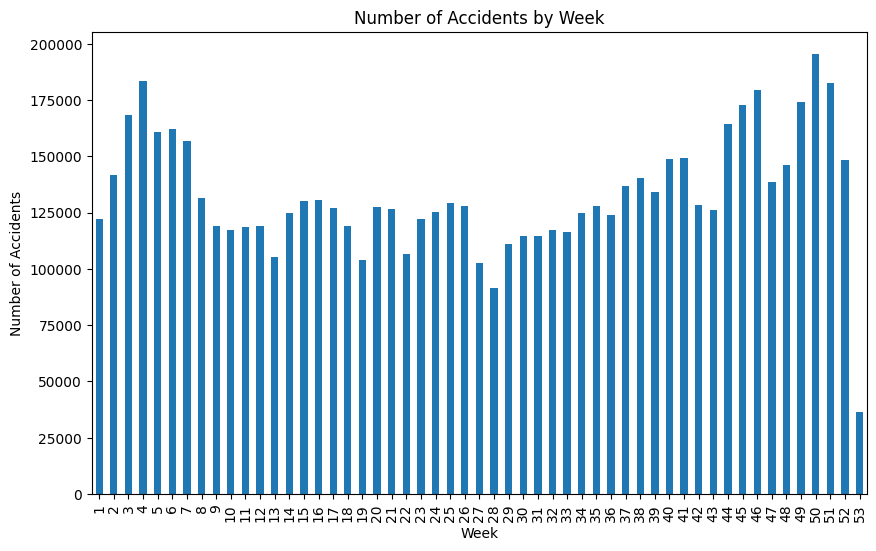

In [76]:
plt.figure(figsize=(10,6))
df_train['Week'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Accidents by Week')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.show()

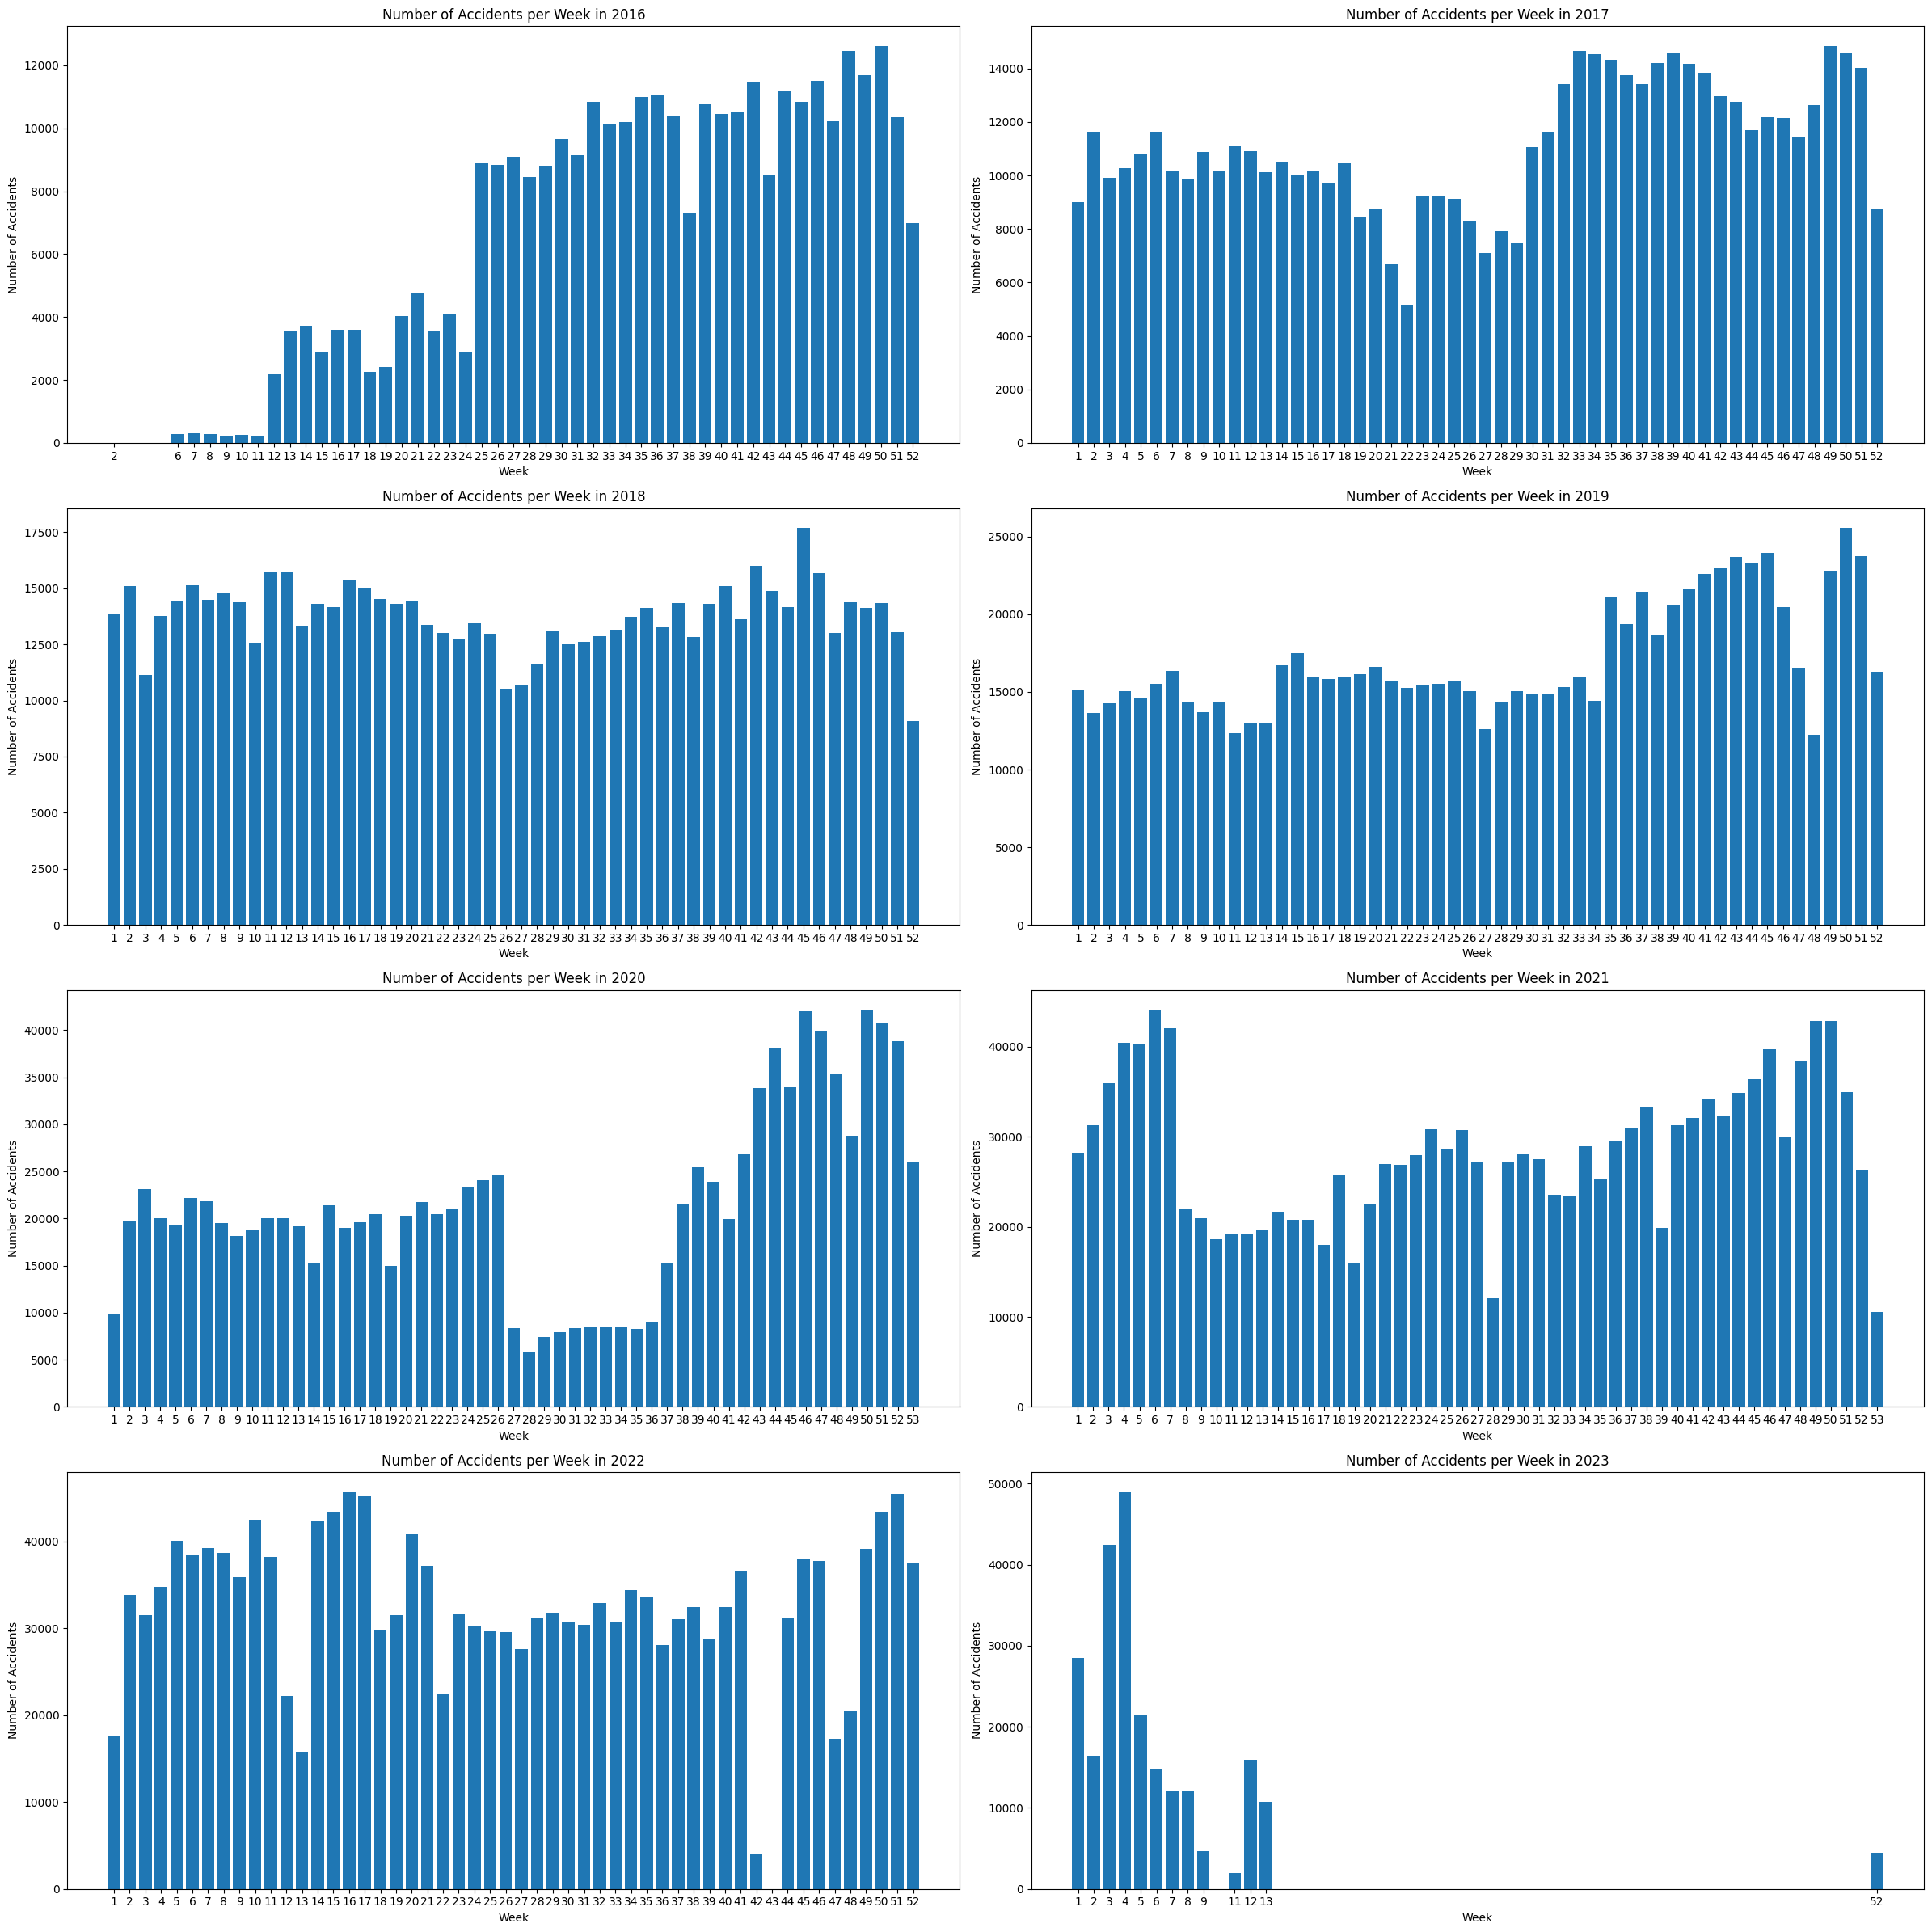

In [78]:
df_train['Week'] = df_train['Week'].fillna(-1).astype(int)
grouped = df_train.groupby(['Year', 'Week']).size().reset_index(name='Accident_Count')

n_cols = 2
n_years = len(grouped['Year'].unique())
n_rows = int(np.ceil(n_years / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12*n_cols, 6*n_rows))

for i, year in enumerate(grouped['Year'].unique()):
    row = i // n_cols
    col = i % n_cols
    weekly_data = grouped[grouped['Year'] == year]
    axs[row, col].bar(weekly_data['Week'], weekly_data['Accident_Count'], tick_label=weekly_data['Week'])
    axs[row, col].set_title(f'Number of Accidents per Week in {year}')
    axs[row, col].set_xlabel('Week')
    axs[row, col].set_ylabel('Number of Accidents')

if n_years % n_cols != 0:
    for col in range(n_years % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, col])

plt.tight_layout()
plt.show()


#### Weekday Analysis

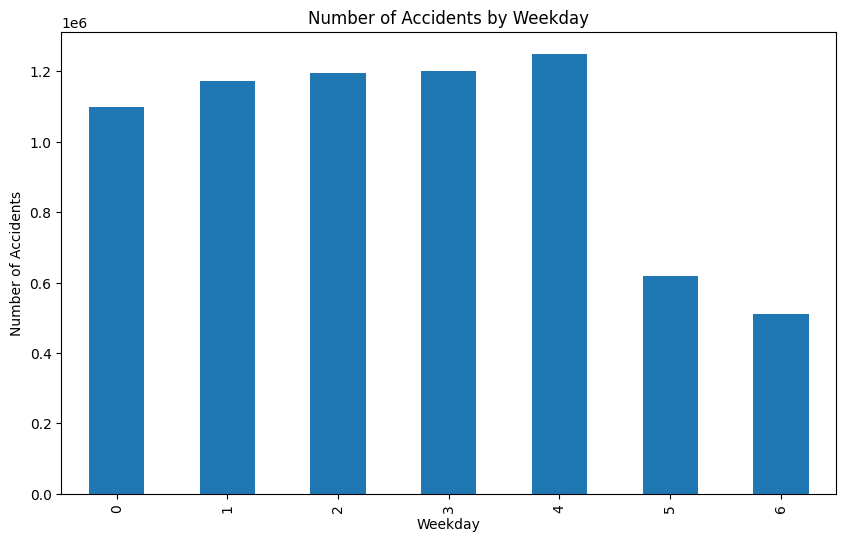

In [79]:
plt.figure(figsize=(10,6))
df_train['Weekday'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Accidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.show()

#### Hour Analysis

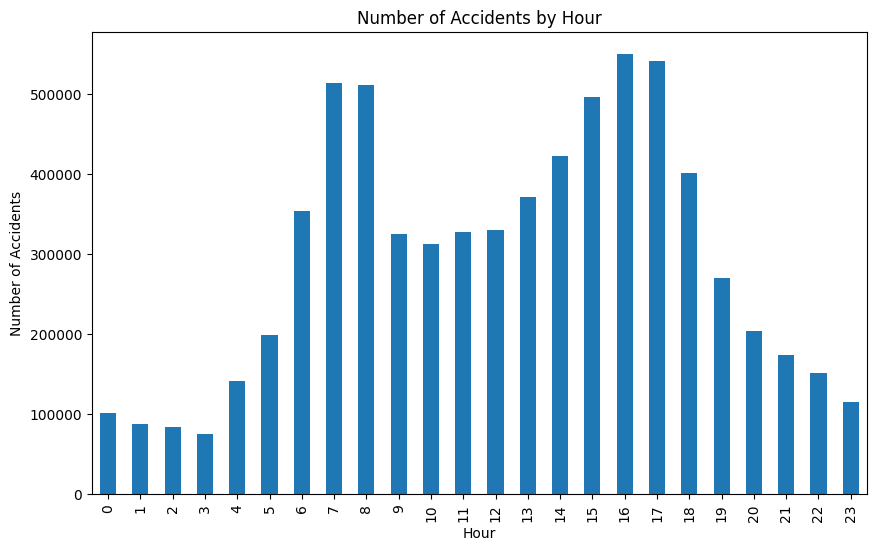

In [80]:
plt.figure(figsize=(10,6))
df_train['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Accidents by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

**Findings:** From the above figures we can find that:

* According to Year Analysis: It can be observed that the number of accidents has increased over years. Many factors can affect this increase like increasing population, new cars are made while old cars get cheaper and people started following travel trends and bough more cars

*   According to Month Analysis: We can see that there is some increase in the accidents in last months and first month of the year, and this may be due to summer break and the new school term break. Though, it is not a general case where we need more investigations to confirsm this conclusion. Also, during 2020 we can see a noticable in the accidents number due to covid-19 panademic.

*   According to Week Analysis: it is following the month analysis trend in the rate oof accidents.  

*   According to Weekday Analysis: we can see equal rates of accidents across all the workdays in the week while less accidents on weekends. That points us to conclude that during weekends many activities take a break and that leads to less portion of vehicles on the roads, thus fewer accidents. 

*   According to cabin Hour Analysis: There are two time periods with heightened activity: one occurs in the morning between 6 am and 9 am, while the other takes place between 3 pm and 6 pm. These observations support the notion that increased traffic during morning and evening rush hours may contribute to a higher incidence of accidents.

## **Machine Learning Models**

### converting categorical values to numerical values

In [18]:
df_train = df_train.drop(["Street", 'Description', 'Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight','County', 'Country', 'index', 'ID','Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', "Weather_Timestamp",'Temperature_binned', 'Humidity_binned', 'Pressure_binned'] ,axis=1)
label_encoder = LabelEncoder()

df_train['Source'] = label_encoder.fit_transform(df_train['Source'])


df_train['City'] = label_encoder.fit_transform(df_train['City'])


df_train['State'] = label_encoder.fit_transform(df_train['State'])


df_train['Airport_Code'] = label_encoder.fit_transform(df_train['Airport_Code'])

df_train['Zipcode'] = label_encoder.fit_transform(df_train['Zipcode'])

df_train['Timezone'] = label_encoder.fit_transform(df_train['Timezone'])

df_train['Weather_Condition'] = label_encoder.fit_transform(df_train['Weather_Condition'])

df_train['Wind_Direction'] = label_encoder.fit_transform(df_train['Wind_Direction'])

As noticed before the data is unblalanced and is so biased towards class severity 2. A suggested approach to solve this is to heirarichal classification and create multi classifiers than combine them together. 
* Binary Classifier 1: Class 2 vs [Class 1,3,4]
* Binary Classifier 1: Class 3 vs [Class 1,4] 
* Binary Classifier 1: Class 1 vs [Class 4]

This approach is some how similar to the one vs all approach, but due to the data impalance we can't do classification between severity 1 for rxample vs all, ratios between the two groups will be 1:100. So, what came to my mind is to mix between the one vs all algorithm and the heirarichal algorithm.

In [19]:
X = df_train.drop('Severity', axis=1)
y = df_train['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("step 0 \n")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

step 0 



In [20]:
print("step 1 \n")
y_first = (y == 2).astype(int)
classifier_first = RandomForestClassifier(n_jobs=2)
classifier_first.fit(X_scaled, y_first)

print("step 2 \n")
X_second = X_scaled[y != 2]
y_second = (y[y != 2] == 3).astype(int)
classifier_second = RandomForestClassifier(n_jobs=2)
classifier_second.fit(X_second, y_second)

print("step 3 \n")
X_third = X_scaled[(y != 2) & (y != 3)]
y_third = (y[(y != 2) & (y != 3)] == 1).astype(int)
classifier_third = RandomForestClassifier(n_jobs=2)
classifier_third.fit(X_third, y_third)


def predict_hierarchical_model(X_test):
    X_test_scaled = scaler.transform(X_test)
    final_predictions = {}

    predictions_first = classifier_first.predict(X_test_scaled)
    
    class_2_indices = [i for i, x in enumerate(predictions_first) if x == 1]
    final_predictions.update({i: 2 for i in class_2_indices})
    X_test_rest_indices = [i for i, x in enumerate(predictions_first) if x == 0]
    X_test_rest = X_test_scaled[X_test_rest_indices]

    predictions_second = classifier_second.predict(X_test_rest)
    
    class_3_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_second) if x == 1]
    final_predictions.update({i: 3 for i in class_3_indices})
    X_test_rest_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_second) if x == 0]
    X_test_rest = X_test_scaled[X_test_rest_indices]

    predictions_third = classifier_third.predict(X_test_rest)
    
    class_1_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_third) if x == 1]
    class_4_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_third) if x == 0]
    final_predictions.update({i: 1 for i in class_1_indices})
    final_predictions.update({i: 4 for i in class_4_indices})

    final_predictions_sorted = [final_predictions[i] for i in sorted(final_predictions)]

    return final_predictions_sorted


print("Predicting \n")
y_pred = predict_hierarchical_model(X_test)

print("Results \n")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))


step 1 

step 2 

step 3 

Predicting 

Results 

Accuracy:  0.9916238392639359
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     13074
           2       0.99      1.00      0.99   1133919
           3       1.00      1.00      1.00    227753
           4       0.94      0.77      0.85     35566

    accuracy                           0.99   1410312
   macro avg       0.98      0.94      0.96   1410312
weighted avg       0.99      0.99      0.99   1410312



In [20]:
params = {'C': [0.1, 1, 1000], 'solver': ['lbfgs', 'liblinear'], "max_iter" : [100, 1000, 10000]}
classifier = LogisticRegression()

print("step 1")
y_first = (y == 2).astype(int)
# classifier_first = LogisticRegression()
classifier_first = GridSearchCV(classifier, params, cv=5)
classifier_first.fit(X_scaled, y_first)
print("best params: ", classifier_first.best_params_, "\n")
print("best score: ", classifier_first.best_score_, "\n")

print("step 2 \n")
X_second = X_scaled[y != 2]
y_second = (y[y != 2] == 3).astype(int)
# classifier_second = LogisticRegression()
classifier_second = GridSearchCV(classifier, params, cv=5)
classifier_second.fit(X_second, y_second)
print("best params: ", classifier_second.best_params_, "\n")
print("best score: ", classifier_second.best_score_, "\n")

print("step 3 \n")
X_third = X_scaled[(y != 2) & (y != 3)]
y_third = (y[(y != 2) & (y != 3)] == 1).astype(int)
# classifier_third = LogisticRegression()
classifier_third = GridSearchCV(classifier, params, cv=5)
classifier_third.fit(X_third, y_third)
print("best params: ", classifier_third.best_params_, "\n")
print("best score: ", classifier_third.best_score_, "\n")



def predict_hierarchical_model(X_test):
    X_test_scaled = scaler.transform(X_test)
    final_predictions = {}

    predictions_first = classifier_first.predict(X_test_scaled)
    
    class_2_indices = [i for i, x in enumerate(predictions_first) if x == 1]
    final_predictions.update({i: 2 for i in class_2_indices})
    X_test_rest_indices = [i for i, x in enumerate(predictions_first) if x == 0]
    X_test_rest = X_test_scaled[X_test_rest_indices]

    predictions_second = classifier_second.predict(X_test_rest)
    
    class_3_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_second) if x == 1]
    final_predictions.update({i: 3 for i in class_3_indices})
    X_test_rest_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_second) if x == 0]
    X_test_rest = X_test_scaled[X_test_rest_indices]

    predictions_third = classifier_third.predict(X_test_rest)
    
    class_1_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_third) if x == 1]
    class_4_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_third) if x == 0]
    final_predictions.update({i: 1 for i in class_1_indices})
    final_predictions.update({i: 4 for i in class_4_indices})

    final_predictions_sorted = [final_predictions[i] for i in sorted(final_predictions)]

    return final_predictions_sorted


print("Predicting \n")
y_pred = predict_hierarchical_model(X_test)

print("Results \n")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))


step 1
best params:  {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'} 

best score:  0.7349434942576842 

step 2 

best params:  {'C': 1, 'max_iter': 100, 'solver': 'liblinear'} 

best score:  0.820304615803052 

step 3 

best params:  {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'} 

best score:  0.8556376610693569 

Predicting 

Results 

Accuracy:  0.8059181230819847


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     13074
           2       0.81      0.98      0.89   1133919
           3       0.52      0.09      0.16    227753
           4       0.12      0.00      0.00     35566

    accuracy                           0.81   1410312
   macro avg       0.36      0.27      0.26   1410312
weighted avg       0.74      0.81      0.74   1410312



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print("step 1 \n")
y_first = (y == 2).astype(int)
classifier_first = DecisionTreeClassifier()
classifier_first.fit(X_scaled, y_first)

print("step 2 \n")
X_second = X_scaled[y != 2]
y_second = (y[y != 2] == 3).astype(int)
classifier_second = DecisionTreeClassifier()
classifier_second.fit(X_second, y_second)

print("step 3 \n")
X_third = X_scaled[(y != 2) & (y != 3)]
y_third = (y[(y != 2) & (y != 3)] == 1).astype(int)
classifier_third = DecisionTreeClassifier()
classifier_third.fit(X_third, y_third)


def predict_hierarchical_model(X_test):
    X_test_scaled = scaler.transform(X_test)
    final_predictions = {}

    predictions_first = classifier_first.predict(X_test_scaled)
    
    class_2_indices = [i for i, x in enumerate(predictions_first) if x == 1]
    final_predictions.update({i: 2 for i in class_2_indices})
    X_test_rest_indices = [i for i, x in enumerate(predictions_first) if x == 0]
    X_test_rest = X_test_scaled[X_test_rest_indices]

    predictions_second = classifier_second.predict(X_test_rest)
    
    class_3_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_second) if x == 1]
    final_predictions.update({i: 3 for i in class_3_indices})
    X_test_rest_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_second) if x == 0]
    X_test_rest = X_test_scaled[X_test_rest_indices]

    predictions_third = classifier_third.predict(X_test_rest)
    
    class_1_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_third) if x == 1]
    class_4_indices = [X_test_rest_indices[i] for i, x in enumerate(predictions_third) if x == 0]
    final_predictions.update({i: 1 for i in class_1_indices})
    final_predictions.update({i: 4 for i in class_4_indices})

    final_predictions_sorted = [final_predictions[i] for i in sorted(final_predictions)]

    return final_predictions_sorted

print("Predicting \n")
y_pred = predict_hierarchical_model(X_test)

print("Results \n")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))


step 1 

step 2 

step 3 

Accuracy:  0.9916351842712818
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     13074
           2       1.00      0.99      0.99   1133919
           3       0.99      1.00      1.00    227753
           4       0.82      0.94      0.87     35566

    accuracy                           0.99   1410312
   macro avg       0.95      0.98      0.96   1410312
weighted avg       0.99      0.99      0.99   1410312



**NOTE:**
* Many other experiments on different classifiers were done, but unfortunately their cells ouput was omitted while doing other experiments, and some of them can take many hours to run so I will just right the results without showing the output.

* Another point to mention is that I didn't use grid search for decision tree or random forest classifiers as they already gave perfect scores. Also, I wanted to use deep learning techniques like NN but as I mentioned earlier, other classifiers did the job effeciently.

* Also to note that on a side notebook, I manually inspected that the classifiers are working correctly by picking random samples from the df_train and classify it, then check the prediction.


#### **Results:**


* In general, tree based classifiers like decision trees and random forest showed superity in performance over other classifiers as any ther calssifier only predicts one class when given any other class. 

* The main reason for this outweight in the performance of the tree based classifiers is their feature interactions. Tree-based models can naturally capture interactions between different features specially that can be represented in the form of if else statements.

* There are also other reasons like: 
    * Ability of tree based Classifiers to handle imbalanced datasets reasonably well. They build the model based on the structure of the data and can make decisions based on conditions that might only apply to a small subset of the data
    * Surpass od tree based classifiers to model complex non-linear decision boundaries.